In [0]:
import warnings
warnings.filterwarnings('ignore')

# Alzherimers Detection using MRI Scans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!tar -xf "/content/drive/My Drive/AlzModel/dataset.tar.xz"

In [0]:
PATH = 'dataset/'

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

In [0]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(PATH, valid='validation', ds_tfms=tfms, bs=64, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['alzheimers', 'non_alzheimers']

In [8]:
model = cnn_learner(data, models.densenet201, metrics=accuracy, pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:01<00:00, 71.6MB/s]


In [9]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.984039,0.794721,0.700781,00:41
1,0.665975,0.472588,0.775000,00:35
2,0.545752,0.448040,0.767187,00:35
3,0.461174,0.462429,0.789062,00:36
4,0.419377,0.441719,0.792969,00:35


In [0]:
model.save('alzheimersv1-initial')
model.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 4.37E-06


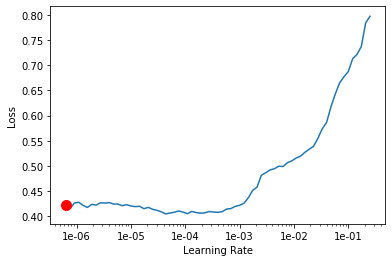

In [15]:
model.lr_find()
model.recorder.plot(suggestion=True)

In [16]:
model.fit_one_cycle(25, max_lr=6.31e-07)

epoch,train_loss,valid_loss,accuracy,time
0,0.410269,0.432756,0.799219,00:47
1,0.417551,0.448924,0.792188,00:46
2,0.414735,0.447320,0.792969,00:46
3,0.406714,0.440315,0.793750,00:47
4,0.406649,0.447733,0.789844,00:47
5,0.409850,0.433160,0.803125,00:47
6,0.404315,0.438350,0.794531,00:46
7,0.408893,0.439763,0.793750,00:47
8,0.399319,0.428638,0.796875,00:46
9,0.394683,0.431175,0.797656,00:46


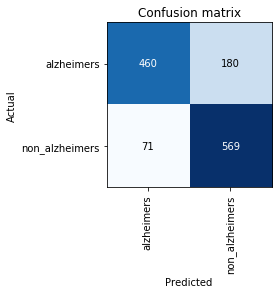

In [17]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

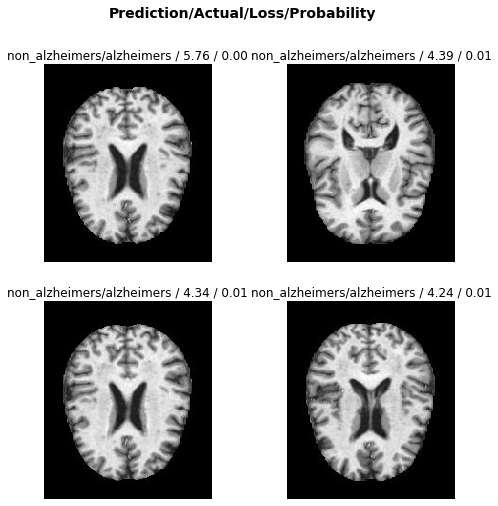

In [18]:
interp.plot_top_losses(4, figsize=(8,8))

In [0]:
model.save('alzheimers')
model.export('/content/drive/My Drive/AlzModel/alzDensenet201.pt')

In [0]:
DRIVE_PATH = '/content/drive/My Drive/AlzModel/'

In [0]:
predictor = load_learner(DRIVE_PATH,'alzDensenet201.pt')

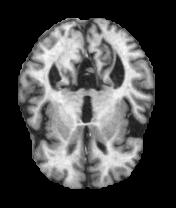

In [22]:
img = open_image(DRIVE_PATH+'YAL0001.jpg')
img

In [23]:
pred = predictor.predict(img)
pred[0]

Category alzheimers